# Proyek Analisis Data: E-Commerce Analys
- **Nama:** Aufa Muthia Indhi Al Hawa
- **Email:** m312d4kx2147@bangkit.academy
- **ID Dicoding:** aufaindhialhawa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren performa pembelian dan revenue pada tahun 2018?
- Bagaimana total pembayaran berdasarkan tipe pembayaran?


## Import Semua Packages/Library yang Digunakan

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [47]:
customers_df = pd.read_csv("customers_dataset.csv", delimiter=",")
customers_df.head()
#melihat data pada tabel customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [48]:
seller_df = pd.read_csv("sellers_dataset.csv", delimiter=",")
seller_df.head()
#melihat data pada tabel seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [49]:
order_df = pd.read_csv("order_payments_dataset.csv", delimiter=",")
order_df.head()
#melihat data pada tabel order payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [50]:
orderdata_df = pd.read_csv("orders_dataset.csv", delimiter=",")
orderdata_df.head()
#melihat data pada tabel order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

In [51]:
customers_df.info()
#mencari informasi mengenai tabel customers untuk mengecek apakah ada kesalaan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [52]:
customers_df.isna().sum()
#mencari informasi mengenai tabel customers untuk mengecek apakah ada missing value

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [53]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
#mencari informasi mengenai tabel customers untuk mengecek apakah ada duplikasi

Jumlah duplikasi:  0


In [54]:
seller_df.info()
#mencari informasi mengenai tabel seller untuk mengecek apakah ada kesalaan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [55]:
seller_df.isna().sum()
#mencari informasi mengenai tabel seller untuk mengecek apakah ada missing value

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [56]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())
#mencari informasi mengenai tabel seller untuk mengecek apakah ada duplikasi

Jumlah duplikasi:  0


In [57]:
order_df.info()
#mencari informasi mengenai tabel order payment untuk mengecek apakah ada kesalaan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [58]:
order_df.isna().sum()
#mencari informasi mengenai tabel order payment untuk mengecek apakah ada missing value

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [59]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())
#mencari informasi mengenai tabel order payment untuk mengecek apakah ada duplikasi

Jumlah duplikasi:  0


In [60]:
orderdata_df.info()
#mencari informasi mengenai tabel order untuk mengecek apakah ada kesalaan tipe data
#bisa dilihat bahwa kolom ke 3-7 masih salah tipe datanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [61]:
orderdata_df.isna().sum()
#mencari informasi mengenai tabel order untuk mengecek apakah ada missing value
#bisa dilihat pada beberapa kolom ada missing value

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [62]:
print("Jumlah duplikasi: ", orderdata_df.duplicated().sum())
#mencari informasi mengenai tabel order untuk mengecek apakah ada duplikasi

Jumlah duplikasi:  0


### Cleaning Data

In [63]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orderdata_df[column] = pd.to_datetime(orderdata_df[column])

orderdata_df.info()

#pada informasi mengenai tabel order, bisa dilihat bahwa masih ada kesalahan tipe data pada beberapa kolom.
#maka, harus diubah dulu ke tipe datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [67]:
orderdata_df[orderdata_df.order_approved_at.isna()]
orderdata_df.dropna(inplace=True)
orderdata_df.isna().sum()
#tidak perlu dilakukan imputasi, karena orderan dicancel sehingga tidak pernah diterima dan dikirim
#sehingga data yang missing dihapus saja

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [68]:
orderdata_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07


## Exploratory Data Analysis (EDA)

### Explore ...

In [69]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58845,1a2c6469954e0f56da59bf0ac75007ed,c4886396b3611751be07179df0696331,77021,palmas,TO
47609,70bc2fe12d0580eb8336285500defe0e,c71792e0cbb396e0a77258f474d971ab,30672,belo horizonte,MG
17898,a5661a6d66cb30d6b8b162e39ca176bc,8751ebbb2d446ef38d4cb0b5637d7a6c,19300,presidente bernardes,SP
21667,fcd8483d6bd11ee87b1e041869ecd2b1,d1e778e53a618168392b6ba7b5e2259c,6362,carapicuiba,SP
62070,7d9203e4350d582ae26d254399c05e44,cc47f99364c6a2b50a87c1bbb3e4f0f8,22470,rio de janeiro,RJ


In [70]:
customers_df.describe(include="all")
#untuk melihat nilai statistik deskriptif dari tabel customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [71]:
customers_df.customer_zip_code_prefix.is_unique

False

In [72]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
#untuk melihat persebaran customers berdasarkan city

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [73]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
#untuk melihat persebaran customers berdasarkan state

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [74]:
order_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
26823,1b27045ffd0c3cc49c737c6ec7c4756a,1,credit_card,1,628.42
8293,57597099a6ac29d8c13878e3945ce6ad,1,credit_card,2,127.01
1051,2ce188fdc7fb58e72c2adeedc6419827,1,credit_card,6,190.83
99984,50cf0f713c1a9c9c9bdfbbf31b00eb48,2,voucher,1,135.33
18586,5fc583076cef84351509b68ddf84d932,1,credit_card,3,246.92


In [75]:
order_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std", ]
})
#untuk melihat statistik deskriptif pada kolom tipe payment di tabel order payment

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.703354  115.519185

In [76]:
orderdata_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
77024,c5ab3856ffd5ca3db23754e60db70cf2,016287d04d40c3c1c9625588b9fe4602,delivered,2017-08-15 17:28:20,2017-08-15 18:55:15,2017-08-16 19:27:54,2017-08-17 17:52:02,2017-08-28
84284,eae696a5d4f36a048c3c1e78d611253d,d7f9b99fdd55914fdfeeb0d1992e5a2e,delivered,2018-07-03 15:23:01,2018-07-05 16:30:42,2018-07-05 12:30:00,2018-07-12 17:33:40,2018-07-31
13549,b91b89682b68b44b95f65cd872c65b59,2af7929f6d6289798a0836e5b350d77f,delivered,2017-10-24 23:12:43,2017-10-24 23:28:09,2017-10-26 20:52:46,2017-10-30 20:45:52,2017-11-28
68360,dbf84a758b184e6b2db6068e7cda2a11,2d4bb41e36a71f12848d9f85655d4eba,delivered,2018-03-14 00:40:36,2018-03-16 16:10:36,2018-03-19 18:16:26,2018-04-16 17:08:51,2018-04-05
31416,5217800f8025b50bbddf0d58461486af,f8081ceae7621874a1311c2473ee612e,delivered,2017-12-05 19:04:22,2017-12-05 19:30:49,2017-12-06 17:16:36,2017-12-11 22:12:08,2018-01-05


In [83]:
delivery_time = orderdata_df["order_delivered_customer_date"] - orderdata_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orderdata_df["delivery_time"] = round(delivery_time/86400)

orderdata_df.sample(20)

#untuk menambahkan kolom baru yang merupakan lama dari waktu pengantaran paket

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
41457,c41d1d484d6eba6e4d8d981ed0768193,2718b88837b22bacabdb53fe203c069a,delivered,2018-07-19 21:04:17,2018-07-19 21:23:08,2018-07-20 15:50:00,2018-07-25 12:04:12,2018-08-03,5.0
26345,a1dadce0e5cbb1b1205017166f6ce7ce,6090711df10612ec9df45dc0c7090f7d,delivered,2017-03-14 00:01:26,2017-03-14 00:01:26,2017-03-15 10:34:20,2017-03-21 12:35:57,2017-04-04,6.0
25302,0159c6355a4e32f6ac68d838e2228150,bf0176bae5facd261148fb881ccb8cc6,delivered,2018-06-15 13:41:08,2018-06-15 14:03:58,2018-06-18 12:06:00,2018-06-19 23:21:34,2018-07-03,1.0
71560,dd4d68bbd3083ae0ee1f51019cffc924,2dfdcbb5e15acdd672fbb17cee980938,delivered,2018-01-26 23:16:13,2018-01-26 23:31:37,2018-01-30 22:24:08,2018-02-06 19:35:08,2018-02-26,7.0
85381,d536b84091b6a78e8ee96dc108b21a8e,e1b154db90ab51a05208751d9ac37984,delivered,2018-01-31 08:31:53,2018-01-31 13:51:35,2018-02-02 00:22:03,2018-02-20 00:43:07,2018-02-22,18.0
45856,e4a03f1067b6f71cfad04c77a586d208,9b16b471e3270abd75d0f6b873298f2e,delivered,2018-05-15 17:07:39,2018-05-16 17:21:52,2018-05-18 11:51:00,2018-05-23 15:35:43,2018-06-04,5.0
14373,63a4d7a71c43e2f008340552233931ed,ffeac04ef924e20238b3ad2f9cecfbfa,delivered,2017-02-01 21:13:54,2017-02-01 21:25:17,2017-02-03 10:48:02,2017-02-08 12:15:36,2017-03-08,5.0
20700,a7e81b5cf4f8a13c638129228f4696fb,d436a01cbfaa1bc15ecd84318b408a01,delivered,2017-02-28 22:48:02,2017-03-01 15:35:12,2017-03-02 15:03:59,2017-03-16 09:51:06,2017-04-03,14.0
78510,59b8a01e16359f7855eb1fc04091ca08,dba6a521ff58c91c3b7802383a2b77e9,delivered,2017-08-11 17:35:47,2017-08-11 17:45:16,2017-08-18 17:34:20,2017-08-25 20:37:46,2017-09-12,7.0
29986,371dcdd114490b436dff8fac7d52a928,4f84b7661cfd485a6a01d77cdf0b3a20,delivered,2018-06-27 15:44:06,2018-06-29 02:53:27,2018-06-29 11:03:00,2018-07-11 17:11:55,2018-07-30,12.0


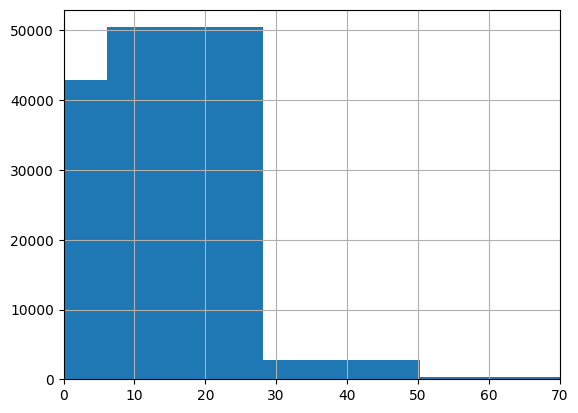

In [84]:
orderdata_df.delivery_time.hist()
plt.xlim(0,70)
plt.show()

#untuk menampilkan histogram dari waktu pengantaran paket (delivery_time)

In [85]:
seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)
##untuk melihat persebaran seller berdasarkan city

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [86]:
seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)
#untuk melihat persebaran seller berdasarkan state

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [87]:
order_orderdata_df = pd.merge(
    left=orderdata_df,
    right=order_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_orderdata_df.head()

#melakukan eksplorasi data dengan 2 buah tabel, yaitu tabel order payment dan tabel order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,credit_card,3.0,179.12


In [88]:
order_orderdata_df.groupby(by=["payment_type", "order_status"]).agg({
    "payment_value": "sum"
})
#untuk melihat banyaknya payment value pada masing-masing tipe payment berdasarkan order status

payment_value
payment_type order_status               
boleto       delivered        2767977.98
credit_card  canceled             748.58
             delivered       12099876.22
debit_card   delivered         208066.88
voucher      delivered         343013.19

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren performa pembelian dan revenue pada tahun 2018?

In [89]:
order_orderdata_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
98794,d520a55c30b5d51d1648d242d1f2b554,cb2b9d2644c16b5823022e6f1db1fd21,delivered,2018-05-30 15:47:49,2018-05-31 03:35:53,2018-06-04 13:20:00,2018-06-27 14:22:49,2018-07-12,23.0,1.0,boleto,1.0,47.28
86460,271d4e7bb763fdd2d4975ca1421ff1cd,b59bbdb15afd9b563d1347e758f7c599,delivered,2017-08-26 21:49:01,2017-08-26 22:16:16,2017-08-28 21:24:33,2017-09-01 20:46:28,2017-09-18,4.0,1.0,credit_card,4.0,76.08
56267,87366ca73707125ffa59204926a728cb,248dc94df0cf7c27d6a37cf5295af05b,delivered,2018-06-07 19:14:27,2018-06-07 19:34:55,2018-06-08 14:01:00,2018-06-09 12:31:29,2018-06-29,1.0,1.0,credit_card,2.0,60.87
3809,260a8f34d9837b682c7a6c52cc8d9193,290af43fe651c812c1836a7075d395ae,delivered,2018-04-13 18:01:03,2018-04-14 02:31:41,2018-04-19 21:26:16,2018-05-10 22:12:51,2018-05-11,21.0,1.0,boleto,1.0,155.99
36293,9f47e04f95b2bba1442d5bbf0611733e,ed6d5239528458c1a45a3b15105ea27e,delivered,2017-05-09 19:28:46,2017-05-09 19:42:28,2017-05-16 15:36:22,2017-05-17 10:42:04,2017-05-25,1.0,1.0,credit_card,6.0,66.79


In [90]:
orderdata_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


In [91]:
monthly_orders_df = order_orderdata_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.head(12)

#untuk mencari data pembelian dan revenue pada beberapa bulan terakhir

,order_purchase_timestamp,order_count,revenue
0,September,1,0.00
1,October,270,47271.20
2,November,0,0.00
3,December,1,19.62
4,January,748,127430.74
5,February,1641,269458.98
6,March,2546,414369.39
7,April,2303,390952.18
8,May,3545,566872.73
9,June,3135,490225.60


In [93]:
monthly_orders_df['order_purchase_timestamp'] = pd.to_datetime(order_orderdata_df['order_purchase_timestamp'])
df_2018 = monthly_orders_df[(monthly_orders_df['order_purchase_timestamp'].dt.year == 2018)]
monthly_sales = df_2018.resample('M', on='order_purchase_timestamp')['order_count'].sum()

#untuk mencari data pembelian bulanan pada tahun 2018

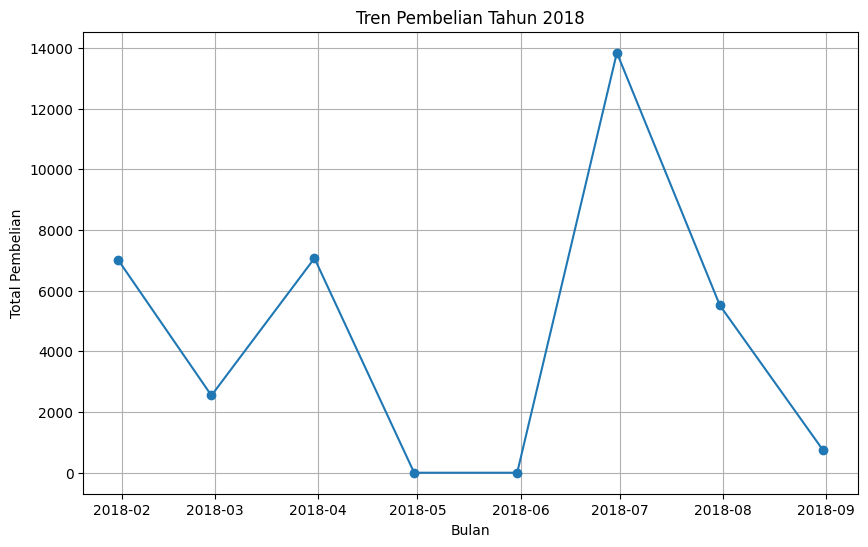

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Tren Pembelian Tahun 2018')
plt.xlabel('Bulan')
plt.ylabel('Total Pembelian')
plt.grid(True)
plt.show()

#untuk menunjukkan diagram garis dari data pembelian tahun 2018

In [96]:
monthly_orders_df['order_purchase_timestamp'] = pd.to_datetime(order_orderdata_df['order_purchase_timestamp'])
df_2018 = monthly_orders_df[(monthly_orders_df['order_purchase_timestamp'].dt.year == 2018)]
monthly_revenue = df_2018.resample('M', on='order_purchase_timestamp')['revenue'].sum()

#untuk mencari data revenue bulanan pada tahun 2018

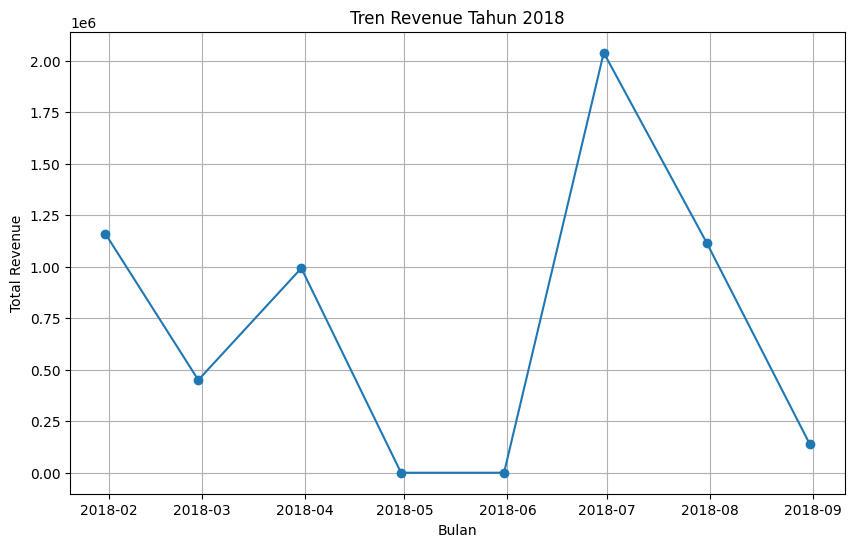

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Tren Revenue Tahun 2018')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

#untuk menunjukkan diagram garis dari data revenue tahun 2018

### Pertanyaan 2: Bagaimana total pembayaran berdasarkan tipe pembayaran?


In [97]:
order_orderdata_df.groupby(by=["payment_type"]).agg({
    "payment_value": "sum"
})

#untuk menunjukkan total hasil pembayaran yang didapatkan dari tiap tipe payment

,payment_value
payment_type,
boleto,2767977.98
credit_card,12100624.80
debit_card,208066.88
voucher,343013.19


<ipython-input-98-00c493847ec8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='payment_value', data=payment_type_sum, palette='pastel')


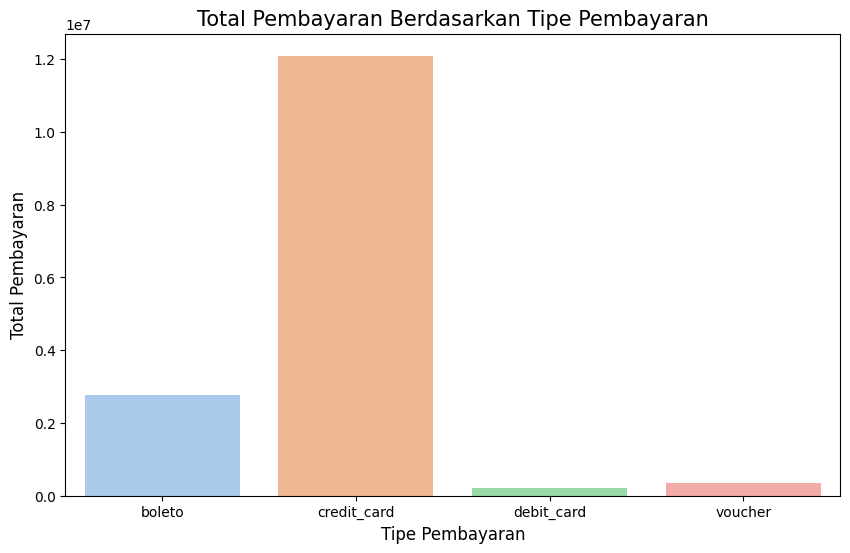

In [98]:
payment_type_sum = order_orderdata_df.groupby(by=["payment_type"]).agg({
    "payment_value": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='payment_value', data=payment_type_sum, palette='pastel')
plt.title('Total Pembayaran Berdasarkan Tipe Pembayaran', fontsize=15)
plt.xlabel('Tipe Pembayaran', fontsize=12)
plt.ylabel('Total Pembayaran', fontsize=12)
plt.show()

#untuk melihat diagram batang dari total pembayaran berdasarkan tipe pembayaran

## Conclusion

- Conclution pertanyaan 1 : Bagaimana tren performa pembelian dan revenue pada tahun 2018?

Bisa dilihat bahwa total penjualan dan revenue setiap bulan pada tahun 2018 cenderung fluktuatif, tidak stabil, dan tidak memiliki tren yang naik. Saran bisnis yang bisa diberikan adalah penjual e-commerce bisa menaikkan promosi dan menganalisis kembali target pasar.



*   Conclution pertanyaan 2 : Bagaimana total pembayaran berdasarkan tipe pembayaran?

Bisa dilihat bahwa credit card digunakan paling banyak, kemudian disusul oleh boleto, voucher, dan debit_card. Saran bisnis yang bisa diberikan adalah seller bisa mengoptimalkan alat pembayaran elektronik credit card karena banyak pelanggan yang menggunakan tipe pembayaran tersebut.




Download File CSV

In [ ]:
from google.colab import files

order_orderdata_df.to_csv('data.csv', index=False)

files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

monthly_orders_df.to_csv('data1.csv', index=False)

files.download('data1.csv')